In [11]:
import pandas as pd
import itertools as it
import numpy as np
from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import time
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../../data/clean/aquifer/auser.csv', index_col=0)
df.index = pd.to_datetime(df.index)
X = df['Rainfall_Gallicano']

In [3]:
p = d = q = list(range(3))
pdq = list(it.product(p,d,q))
spdq = list(it.product(p,d,q,(5,)))
models = list(it.product(pdq,spdq))

In [4]:
# bestAIC = np.inf
# bestParams = None
# bestSParams = None

# for params, sparams in tqdm(models):
#     break
#     m = SARIMAX(
#         X,
#         order=params,
#         seasonal_order=sparams,
#         enforce_stationarity=False,
#         enforce_invertibility=False,
#         freq='D'
#     )
#     mf = m.fit()
#     if mf.aic < bestAIC:
#         bestAIC, bestParams, bestSParams = mf.aic, params, sparams

In [82]:
times = []
saw = set()

for _ in range(100):
    i = None
    while i is None or i in saw:
        i = random.randint(0, len(models))
    saw.add(i)
    a = time.perf_counter()
    SARIMAX(df_gall['type'], order=models[i][0], seasonal_order=models[i][1], enforce_stationarity=False, enforce_invertibility=False, freq='D').fit()
    b = time.perf_counter()
    times.append(b - a)

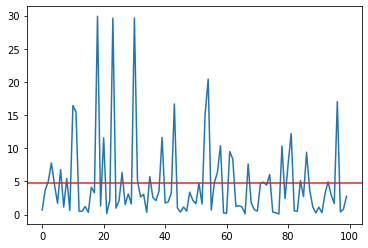

In [83]:
plt.plot(times)
plt.axhline(np.mean(times), c='C3')
plt.show()

In [22]:
def ann_plot(n, s):
    beg = s.index[0].year
    end = s.index[-1].year
    r = end - beg + 1
    
    fig, axs = plt.subplots(r, 1, figsize=(20,5*r), sharey=True)
    for i, yr in enumerate(range(beg, end+1)):
        x0 = datetime(yr, 1, 1)
        xcurr = x0
        x = []
        while xcurr.year == yr:
            x.append(xcurr)
            xcurr += timedelta(days=1)
        y = s[(s.index >= x[0]) & (s.index <= x[-1])]
        if len(y) != len(x):
            ii = 0
            ref = y.index[-1] if yr == end else y.index[0]
            if yr == end:
                while len(y) != len(x):
                    idx = ref + timedelta(days=ii)
                    y = y.append(pd.Series([float('nan')], index=[idx]))
                    ii += 1
            else:
                while len(y) != len(x):
                    idx = ref - timedelta(days=ii)
                    y = pd.Series([float('nan')], index=[idx]).append(y)
                    ii += 1
        axs[i].set_xlim(xmin=x[0] - timedelta(days=10), xmax=x[-1] + timedelta(days=10))
        c = ['gainsboro' if v == min(y.dropna()) else 'royalblue' for v in y]
        axs[i].bar(x, y, color=c)
        axs[i].set_title(f"{n} {yr}")
    
    plt.show()

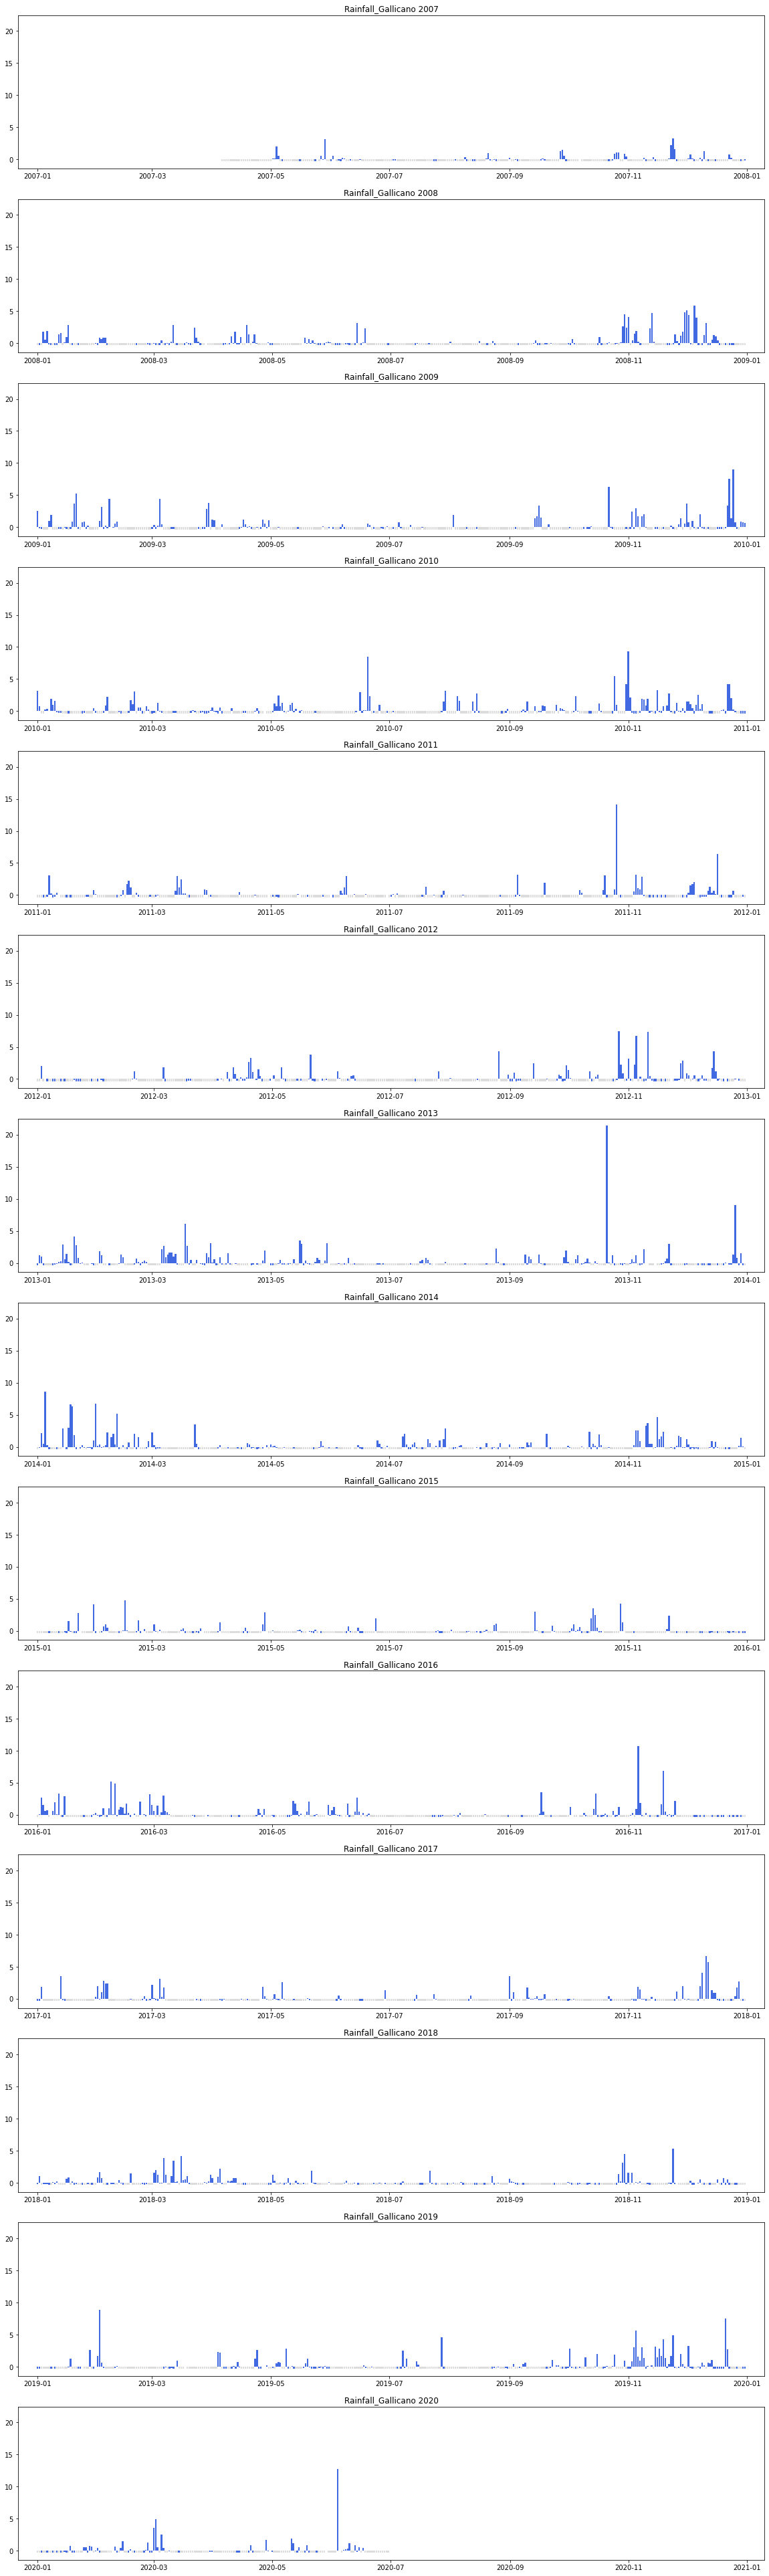

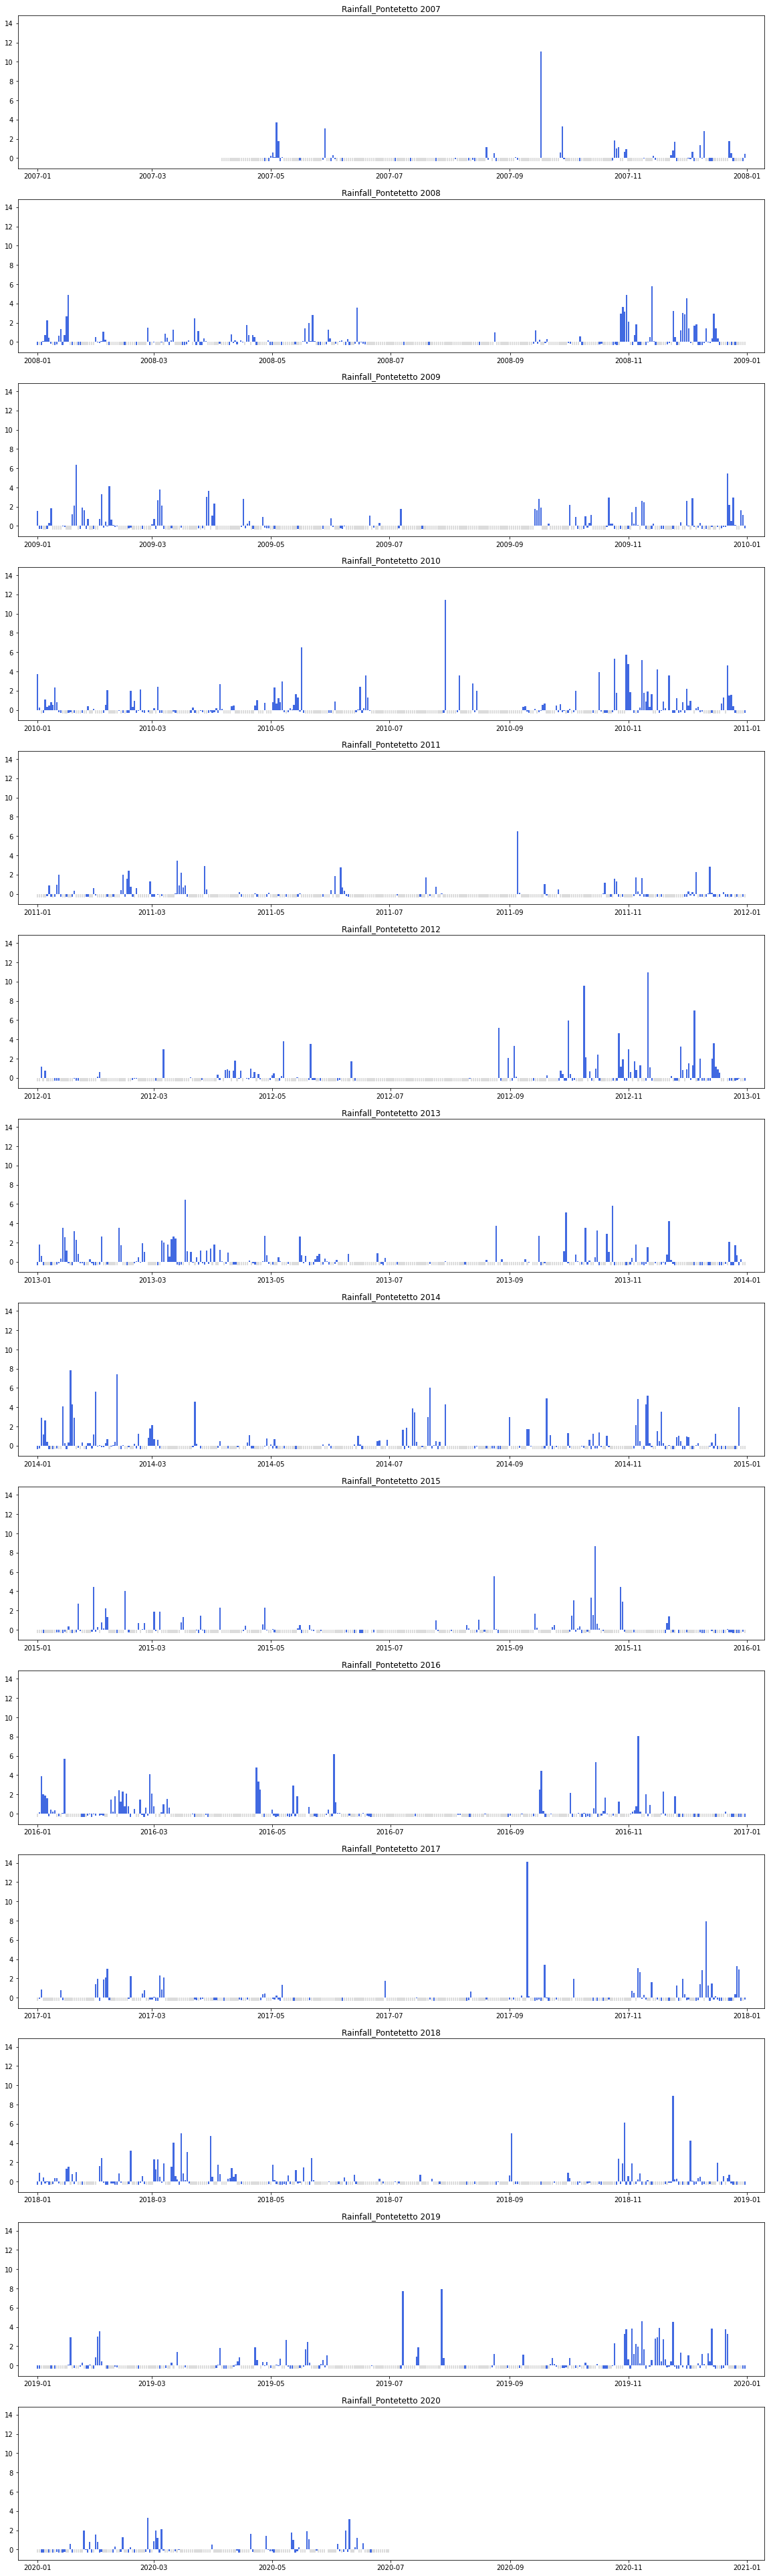

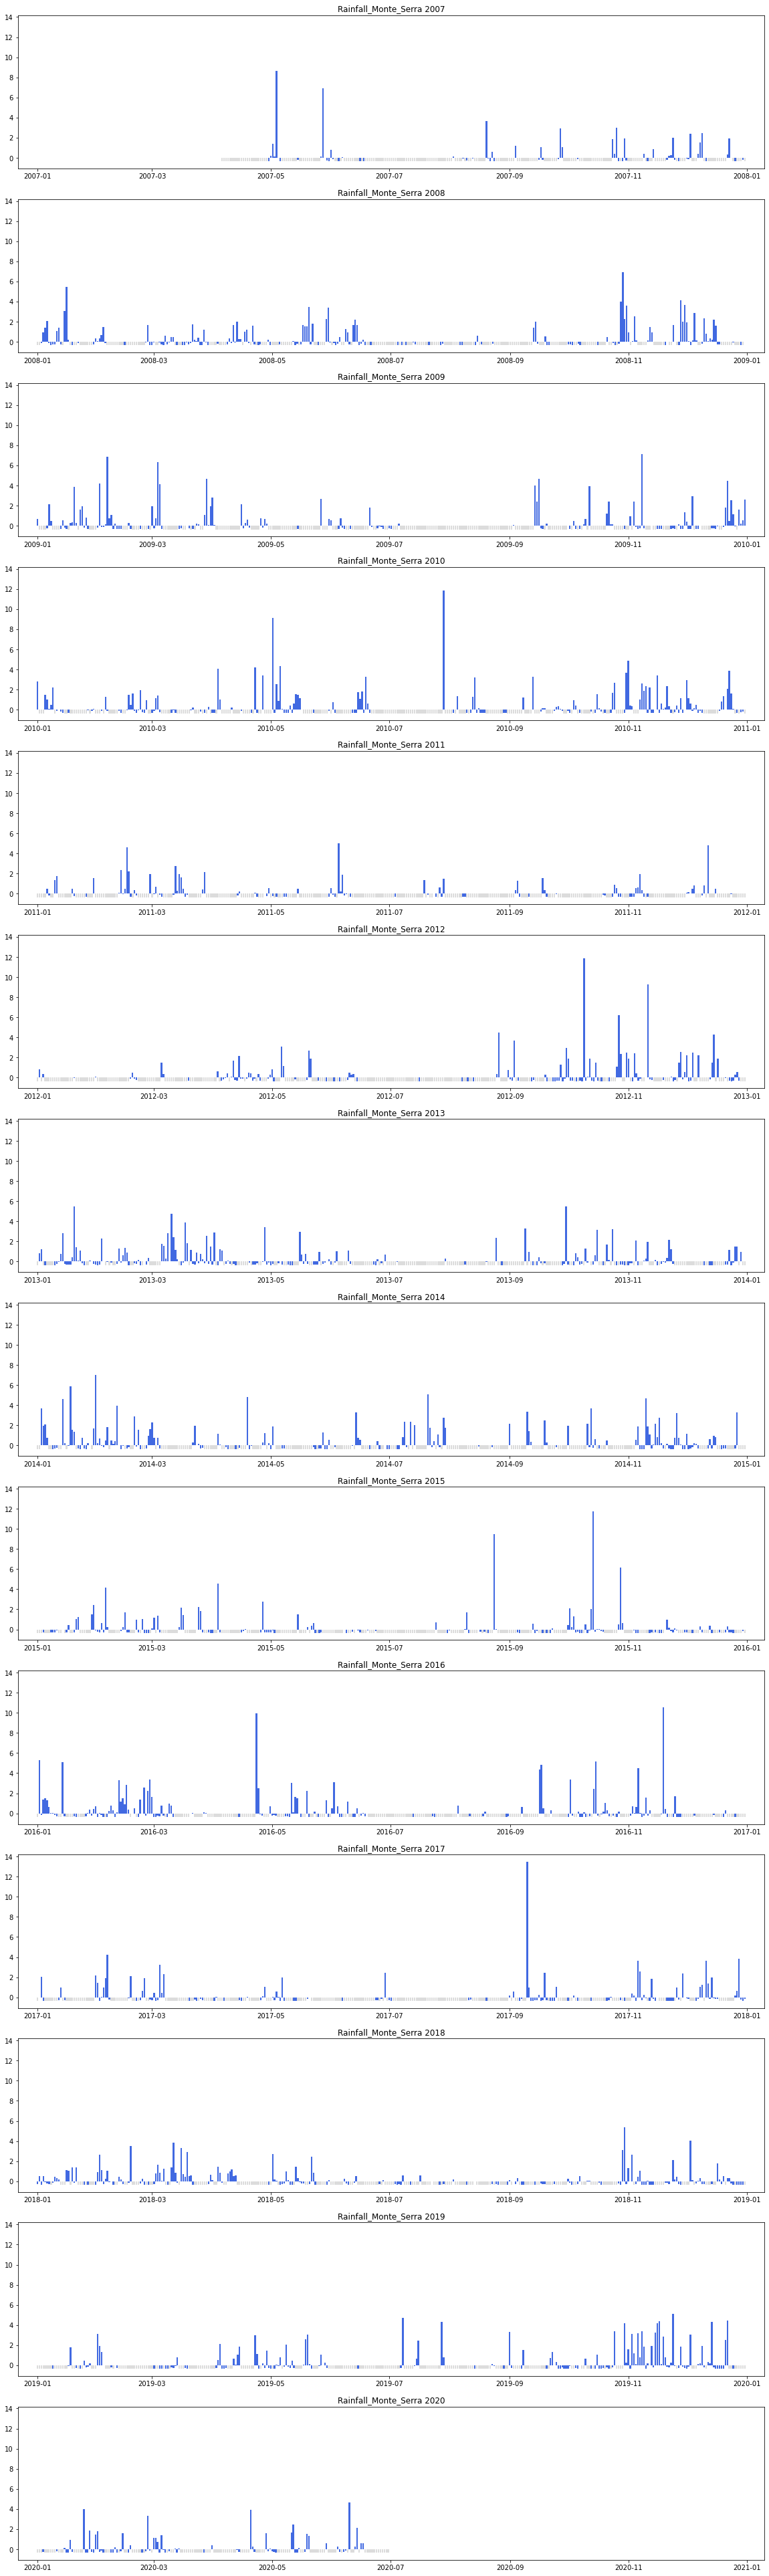

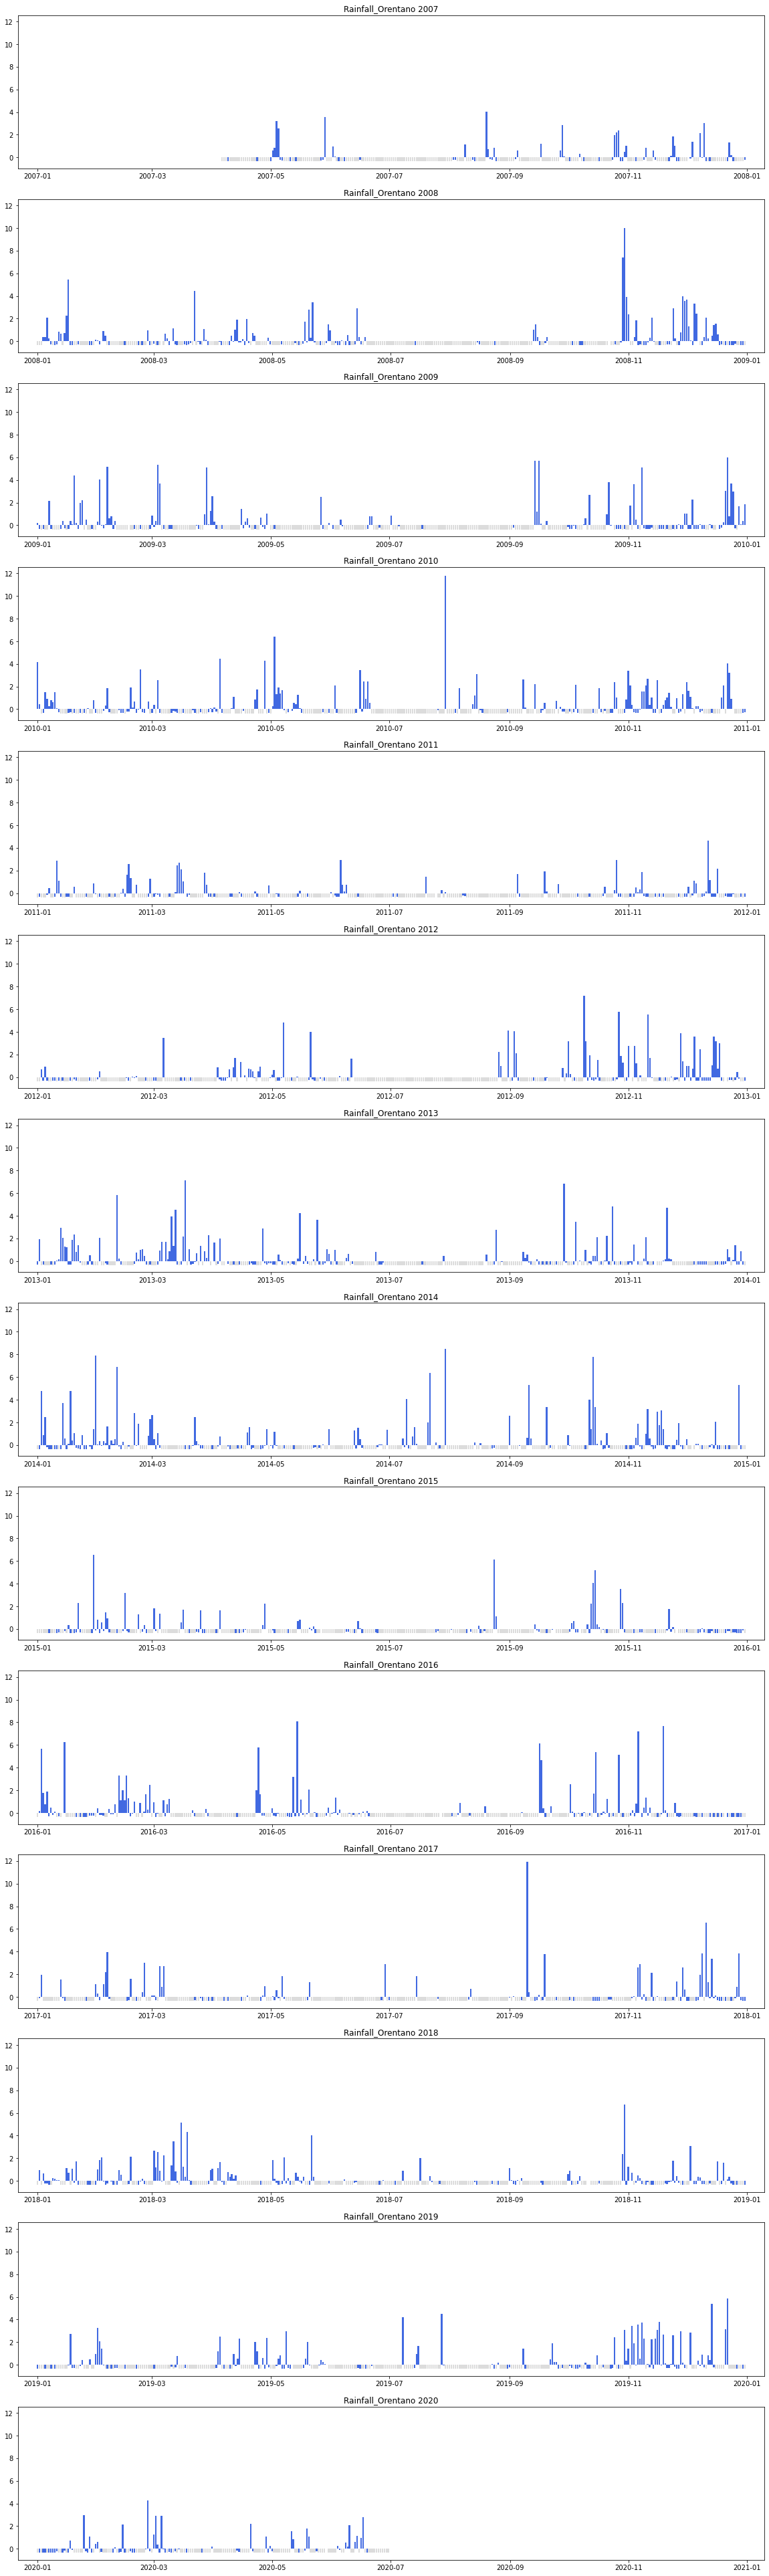

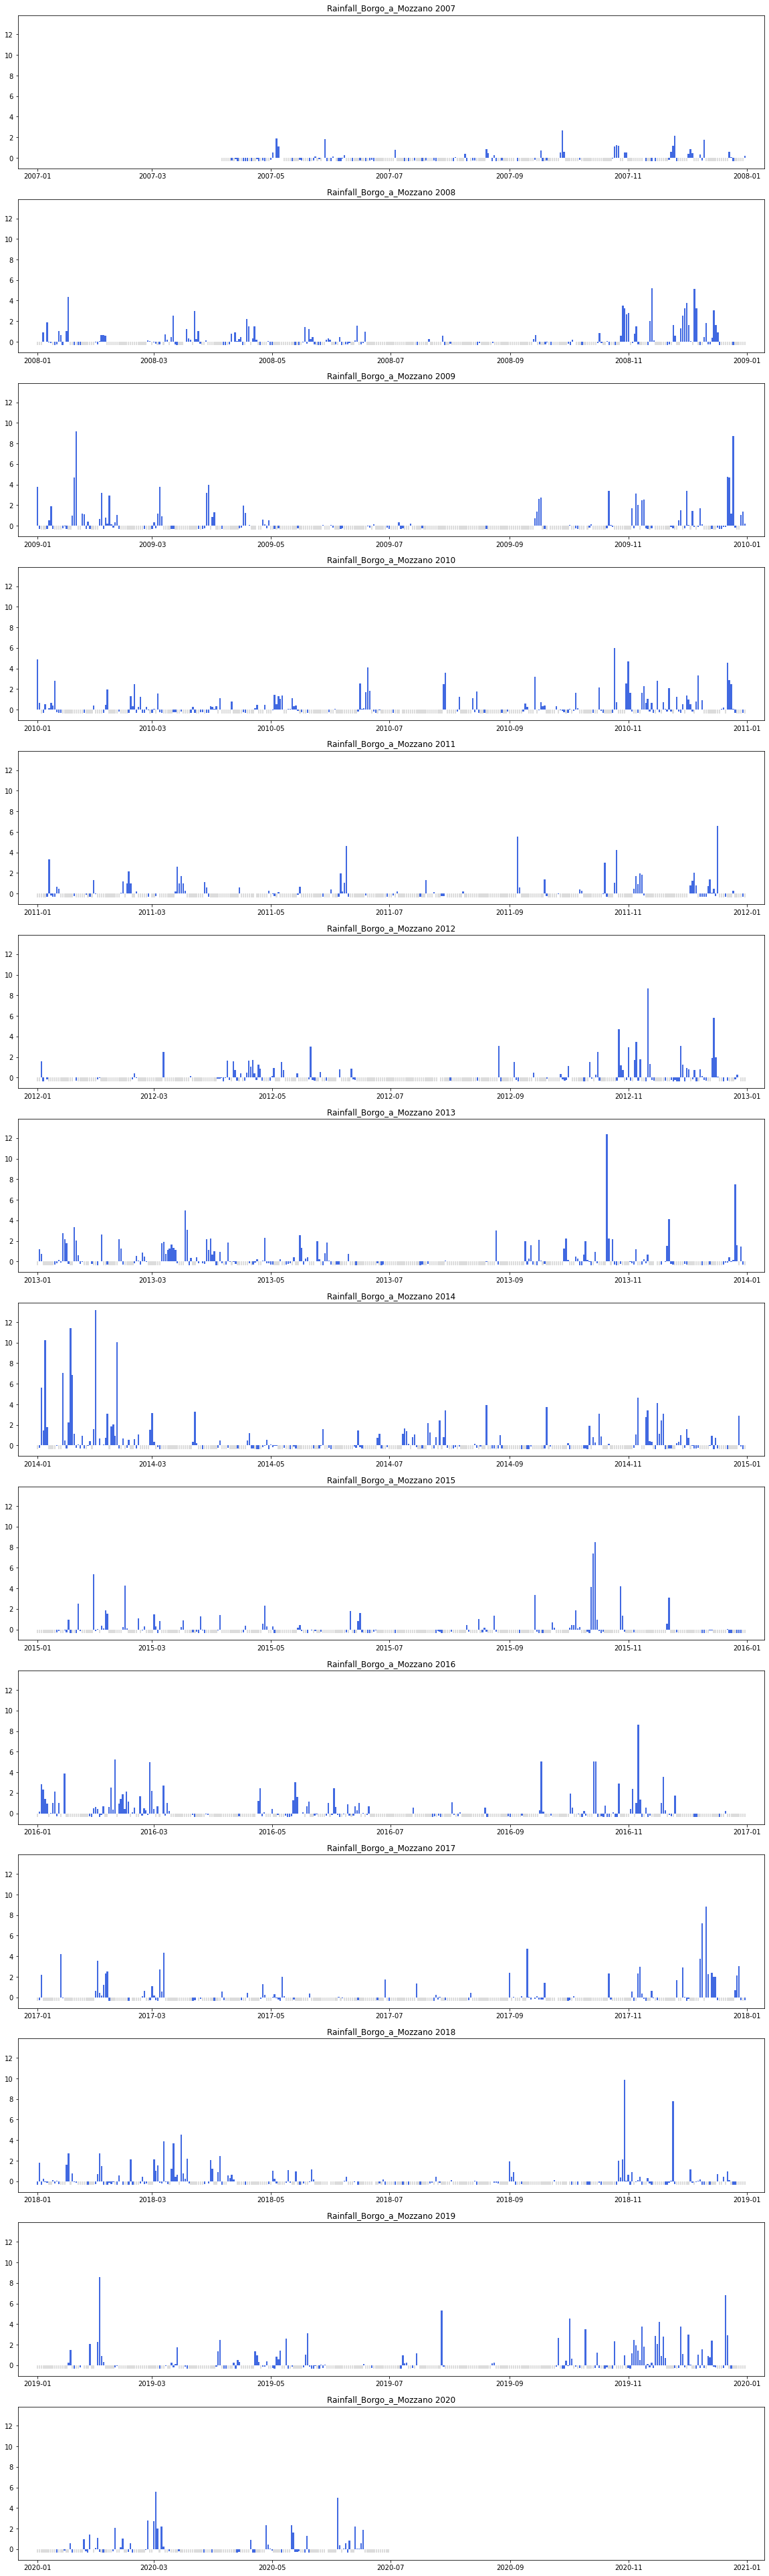

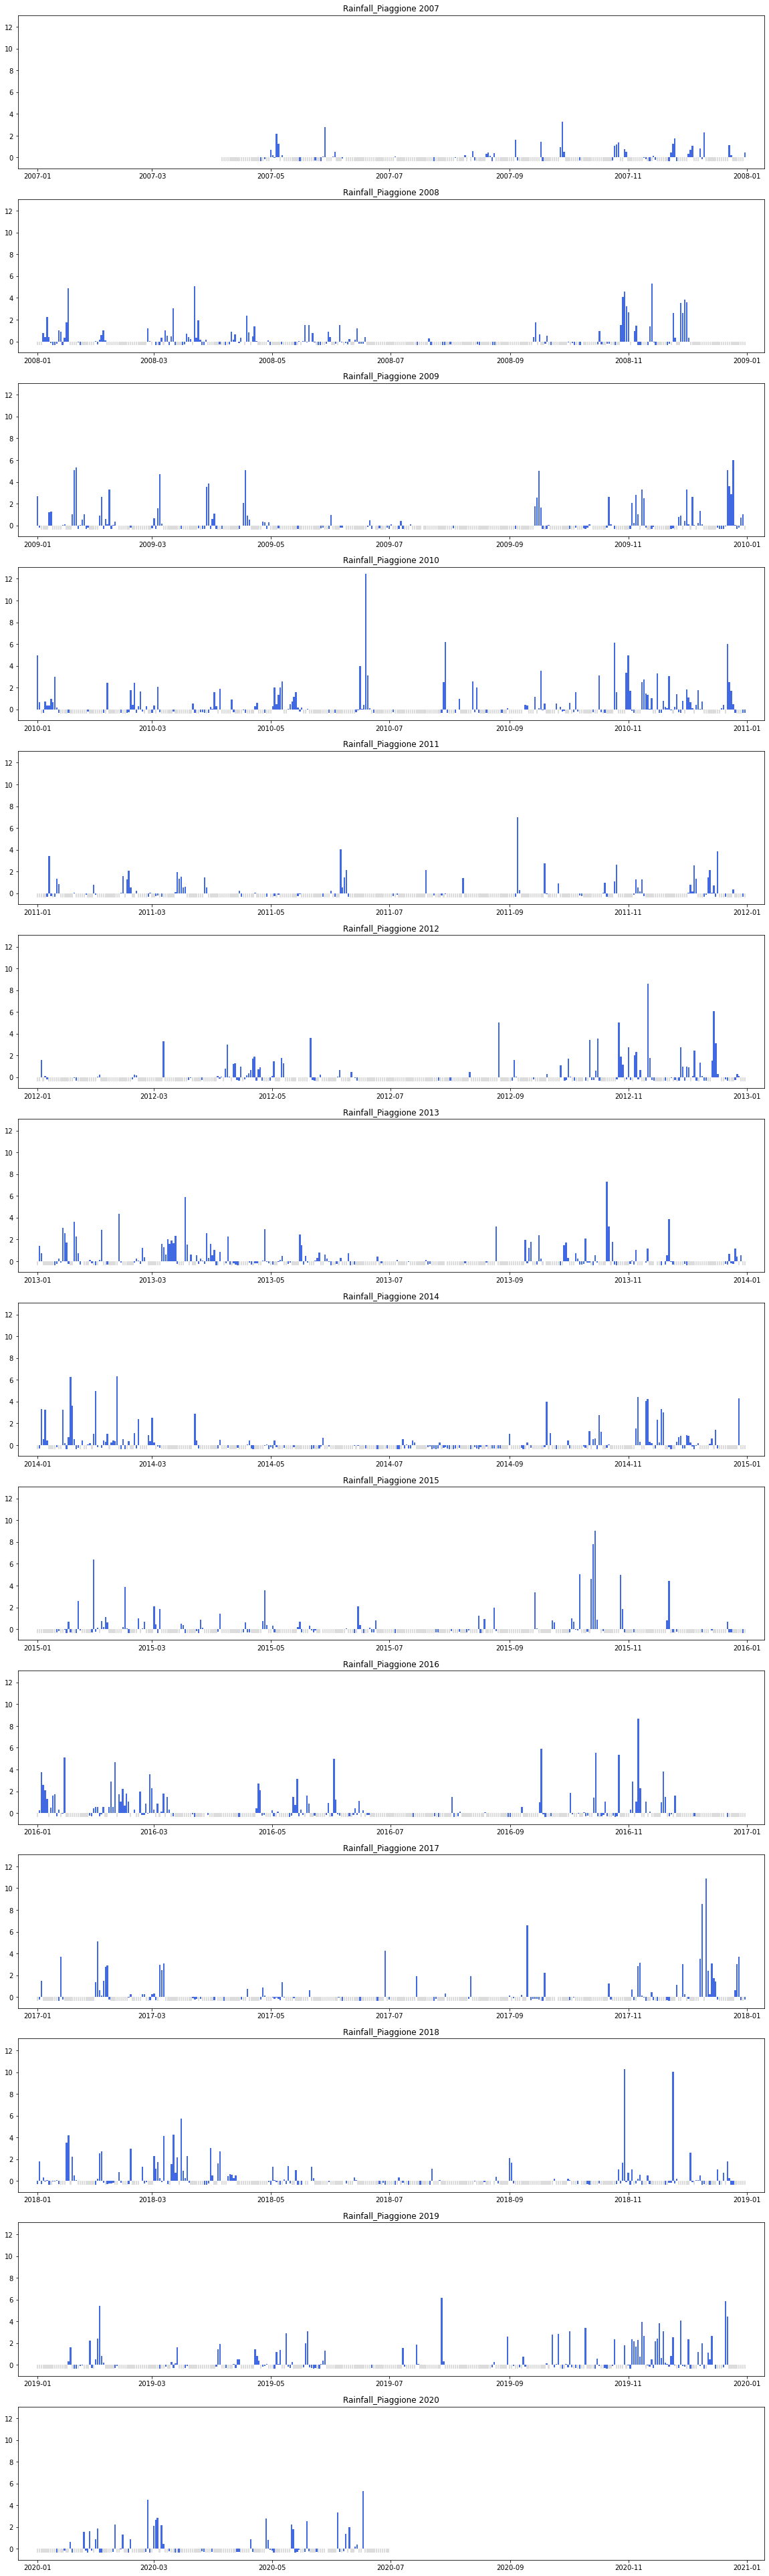

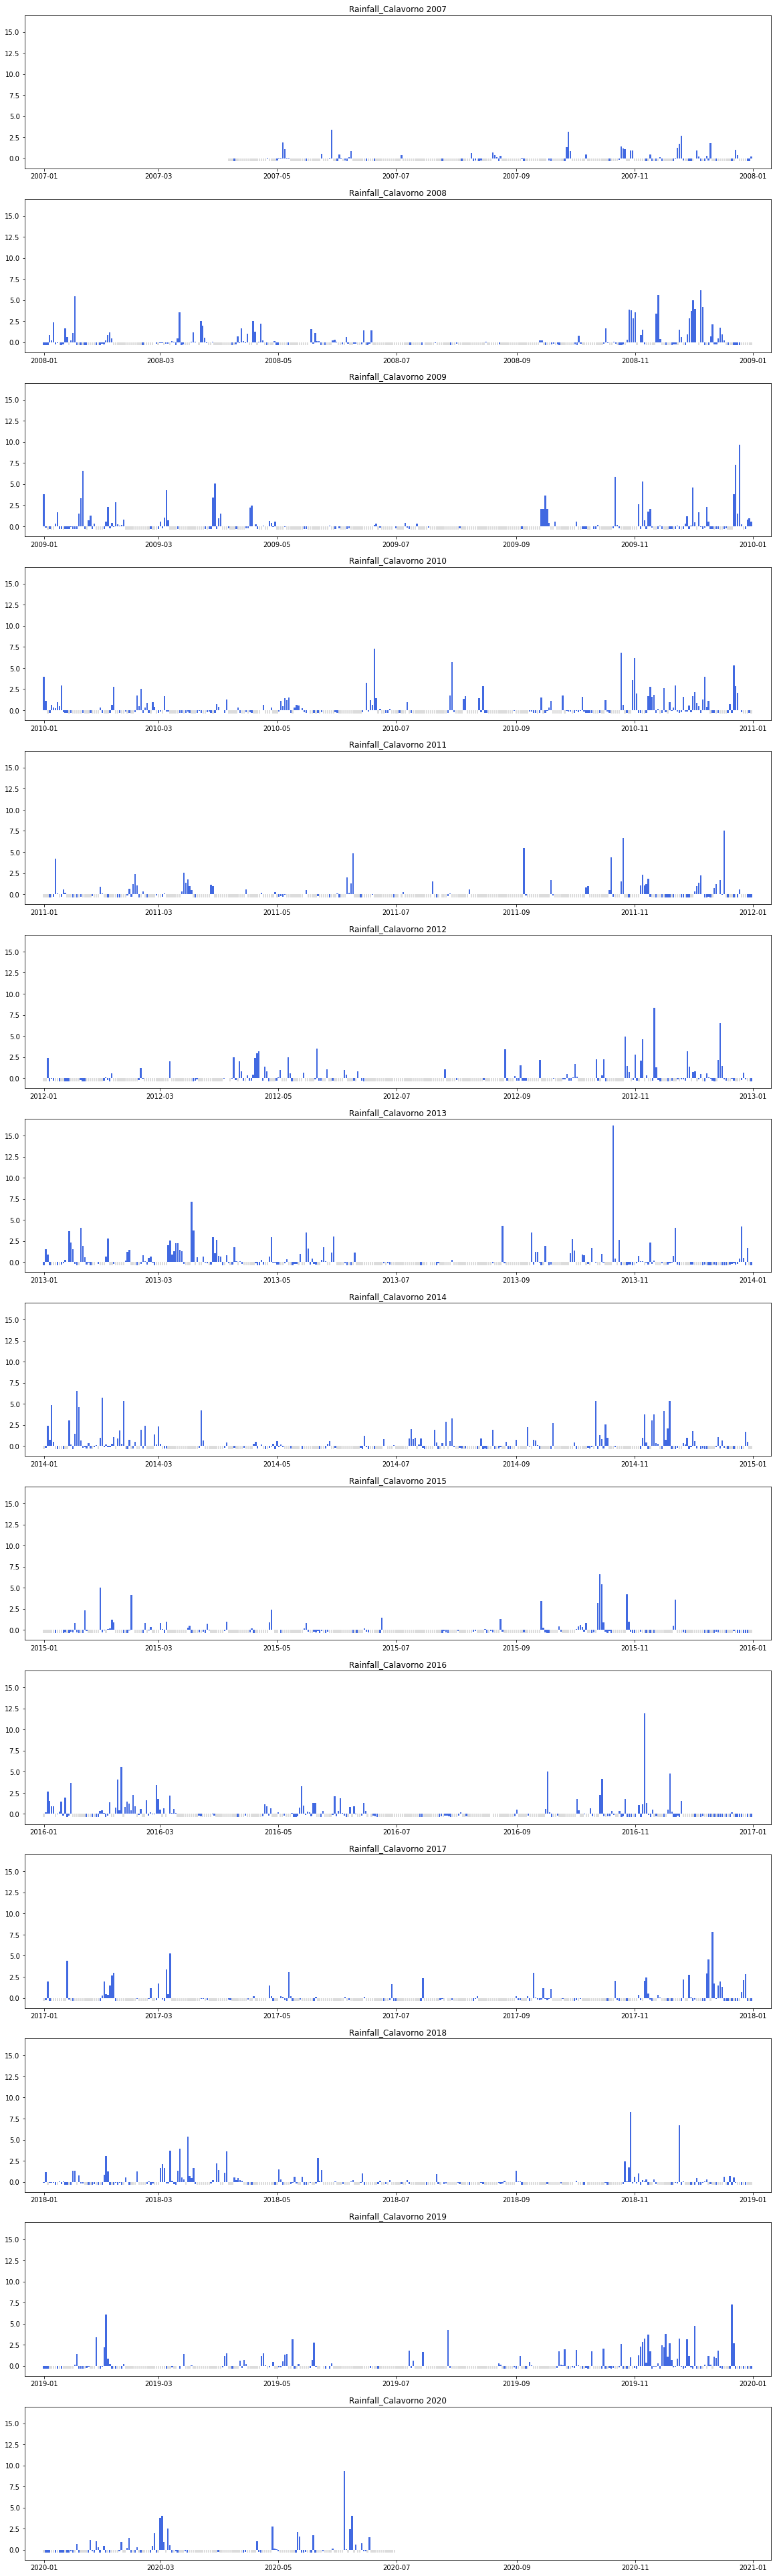

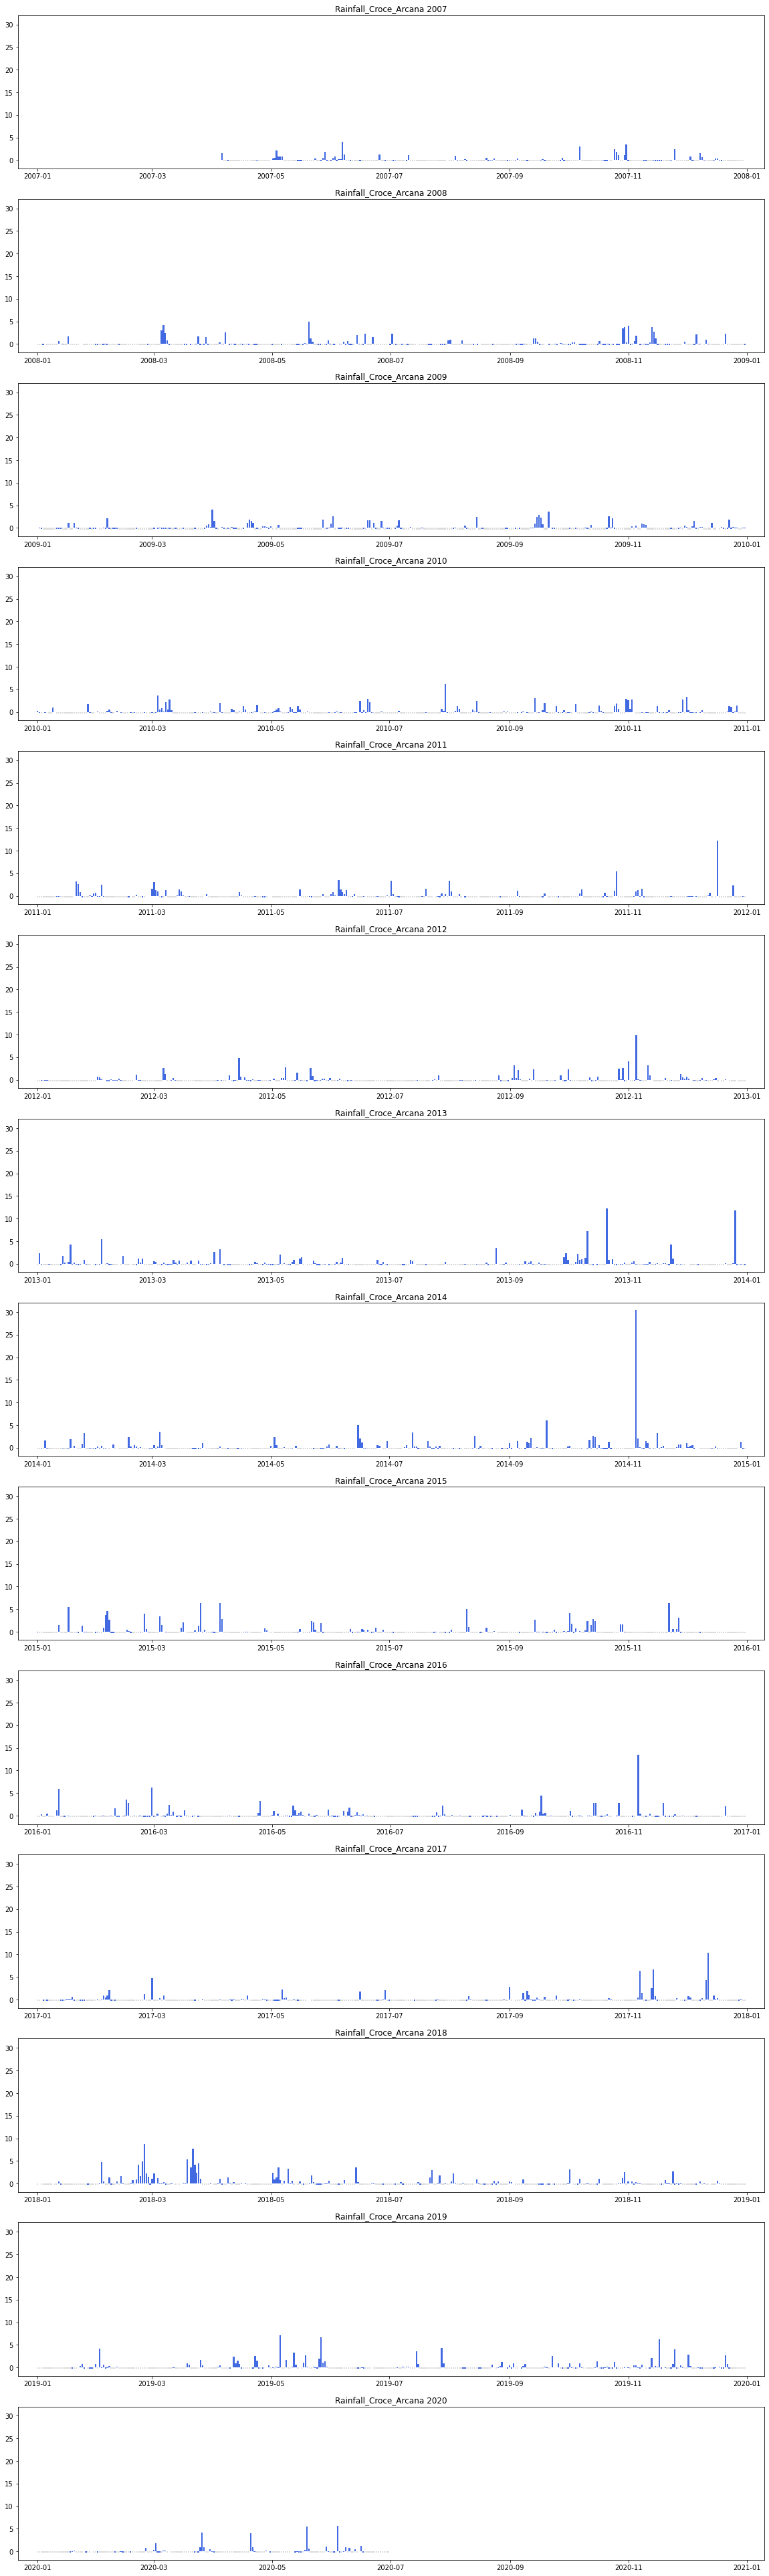

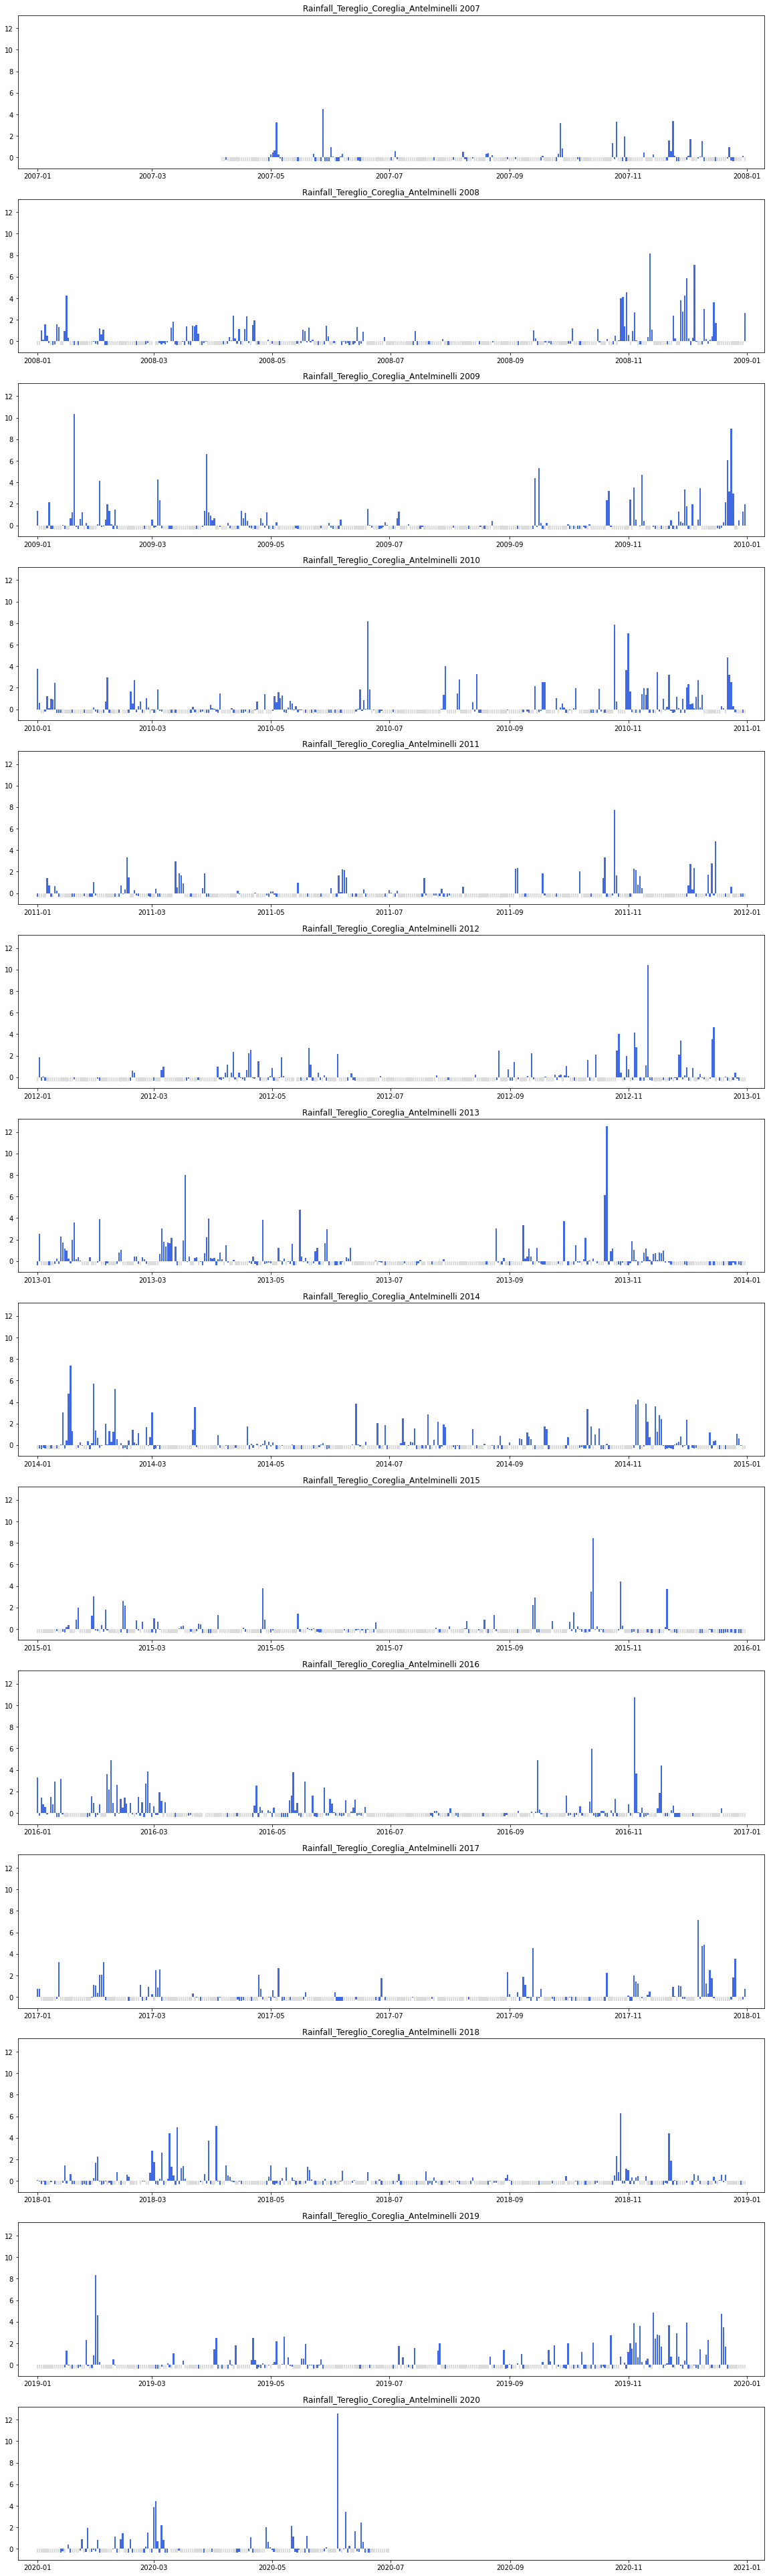

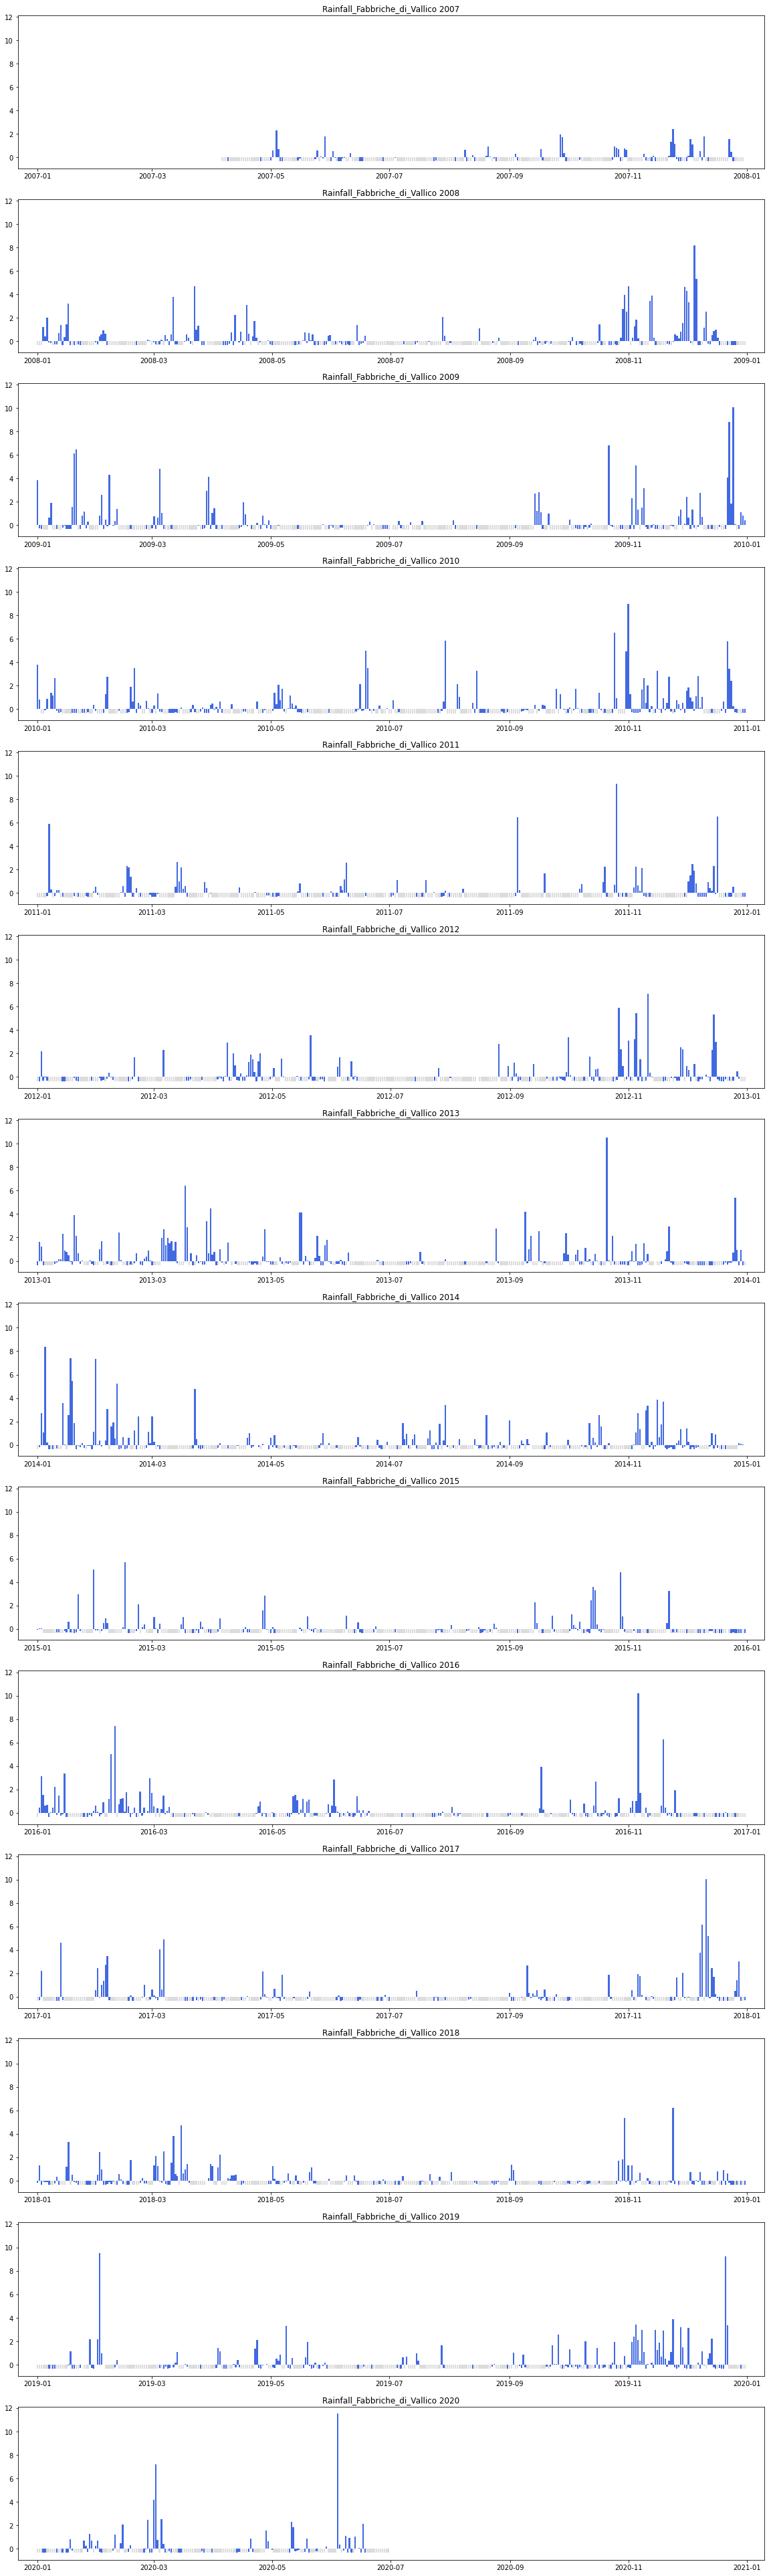

In [24]:
for col in [c for c in df.columns if c.startswith('Rainfall')]:
    ann_plot(col, df[col])

In [25]:
rain_cols = [c for c in df.columns if c.startswith('Rainfall')]

In [28]:
answers = []
for c in rain_cols:
    x = df[c]
    ismin = x == min(x)
    answers.append((c, len(x[ismin]) / len(x)))
cols = [a[0] for a in answers]
vals = [a[1] for a in answers]
answers = pd.Series(vals, index=cols)
answers

Rainfall_Gallicano                         0.607239
Rainfall_Pontetetto                        0.631437
Rainfall_Monte_Serra                       0.596691
Rainfall_Orentano                          0.603723
Rainfall_Borgo_a_Mozzano                   0.631437
Rainfall_Piaggione                         0.649224
Rainfall_Calavorno                         0.585315
Rainfall_Croce_Arcana                      0.616132
Rainfall_Tereglio_Coreglia_Antelminelli    0.594209
Rainfall_Fabbriche_di_Vallico              0.571872
dtype: float64

In [30]:
answers.sort_values(ascending=False)

Rainfall_Piaggione                         0.649224
Rainfall_Pontetetto                        0.631437
Rainfall_Borgo_a_Mozzano                   0.631437
Rainfall_Croce_Arcana                      0.616132
Rainfall_Gallicano                         0.607239
Rainfall_Orentano                          0.603723
Rainfall_Monte_Serra                       0.596691
Rainfall_Tereglio_Coreglia_Antelminelli    0.594209
Rainfall_Calavorno                         0.585315
Rainfall_Fabbriche_di_Vallico              0.571872
dtype: float64

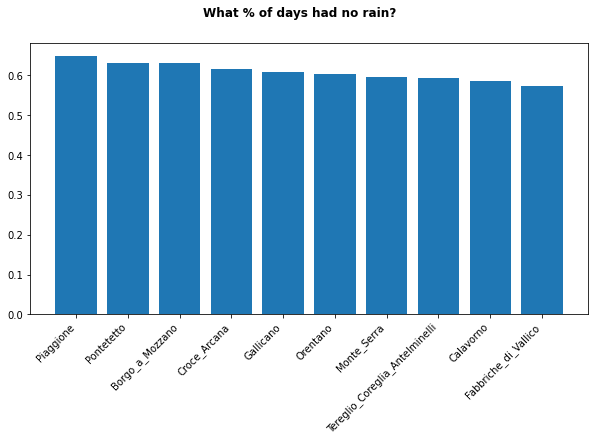

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
x = [c.replace('Rainfall_', '') for c in answers.sort_values(ascending=False).index]
plt.xticks(rotation=45, horizontalalignment='right')
ax.bar(x, answers.sort_values(ascending=False))
plt.suptitle('What % of days had no rain?', fontweight='bold')
plt.show()

In [41]:
answers = []
for c in rain_cols:
    x = df[c]
    isout = x > 6
    answers.append((c, len(x[isout]) / len(x)))
cols = [a[0] for a in answers]
vals = [a[1] for a in answers]
answers = pd.Series(vals, index=cols)
answers

Rainfall_Gallicano                         0.004757
Rainfall_Pontetetto                        0.004343
Rainfall_Monte_Serra                       0.003723
Rainfall_Orentano                          0.004550
Rainfall_Borgo_a_Mozzano                   0.004343
Rainfall_Piaggione                         0.004343
Rainfall_Calavorno                         0.004550
Rainfall_Croce_Arcana                      0.004343
Rainfall_Tereglio_Coreglia_Antelminelli    0.004343
Rainfall_Fabbriche_di_Vallico              0.005584
dtype: float64

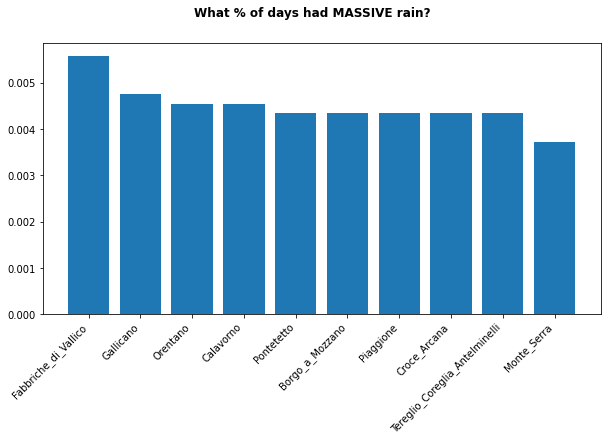

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
x = [c.replace('Rainfall_', '') for c in answers.sort_values(ascending=False).index]
plt.xticks(rotation=45, horizontalalignment='right')
ax.bar(x, answers.sort_values(ascending=False))
plt.suptitle('What % of days had MASSIVE rain?', fontweight='bold')
plt.show()

In [43]:
df_rain = df[rain_cols]

In [44]:
df_rain.index

DatetimeIndex(['2007-04-06', '2007-04-07', '2007-04-08', '2007-04-09',
               '2007-04-10', '2007-04-11', '2007-04-12', '2007-04-13',
               '2007-04-14', '2007-04-15',
               ...
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26', '2020-06-27', '2020-06-28',
               '2020-06-29', '2020-06-30'],
              dtype='datetime64[ns]', length=4835, freq=None)

In [45]:
df_rain['year'] = df_rain.index.year
df_rain['month'] = df_rain.index.month
df_rain['dayofyear'] = df_rain.index.dayofyear
df_rain

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,year,month,dayofyear
2007-04-06,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,1.506308,-0.375272,-0.361914,2007,4,96
2007-04-07,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2007,4,97
2007-04-08,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.234549,-0.361914,2007,4,98
2007-04-09,-0.342654,-0.352156,-0.363405,-0.339641,-0.356838,-0.366032,-0.318888,-0.202768,-0.375272,-0.337752,2007,4,99
2007-04-10,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2007,4,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2020,6,178
2020-06-27,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2020,6,179
2020-06-28,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2020,6,180
2020-06-29,-0.342654,-0.352156,-0.363405,-0.362266,-0.356838,-0.366032,-0.366318,-0.310937,-0.375272,-0.361914,2020,6,181


In [46]:
df_gall = df_rain[['Rainfall_Gallicano', 'month', 'dayofyear']]
df_gall['ismin'] = (df_gall['Rainfall_Gallicano'] == df_gall['Rainfall_Gallicano'].min()).astype(int)
df_gall['isout'] = (df_gall['Rainfall_Gallicano'] > 6 + df_gall['Rainfall_Gallicano'].min()).astype(int)
df_gall

,Rainfall_Gallicano,month,dayofyear,ismin,isout
2007-04-06,-0.342654,4,96,1,0
2007-04-07,-0.342654,4,97,1,0
2007-04-08,-0.342654,4,98,1,0
2007-04-09,-0.342654,4,99,1,0
2007-04-10,-0.342654,4,100,1,0
...,...,...,...,...,...
2020-06-26,-0.342654,6,178,1,0
2020-06-27,-0.342654,6,179,1,0
2020-06-28,-0.342654,6,180,1,0
2020-06-29,-0.342654,6,181,1,0


In [69]:
df_gall['season'] = df_gall['month'].apply(lambda x: 1 if x<4 else 2 if x<7 else 3 if x<10 else 4)
df_gall['type'] = df_gall.apply(lambda r: 1 if r[3] else 3 if r[4] else 2, axis=1)

In [68]:
df_gall.apply(lambda r: 1 if r[3] else 3 if r[4] else 2, axis=1)

1.397931747673216

In [47]:
import seaborn as sns

In [70]:
corr = df_gall.drop(['Rainfall_Gallicano', 'month', 'ismin', 'isout'], axis=1).corr()

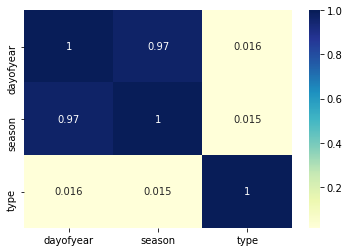

In [71]:
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

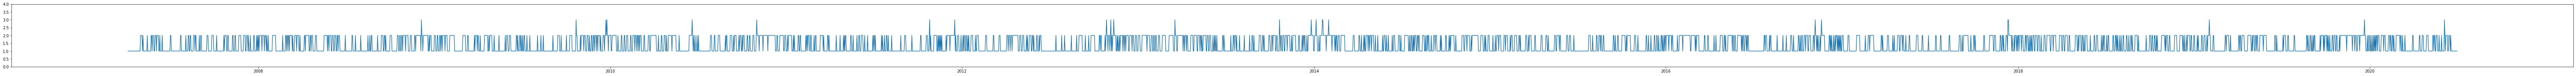

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(120,3))
ax.plot(df_gall.index, df_gall['type'])
ax.set_ylim((0,4))
plt.show()